# MATH&ML-15. Рекомендательные системы. Часть II

## 1. Введение

✍ В предыдущем модуле мы начали знакомиться с рекомендательными системами — кратко разобрали существующие подходы к их построению и научились оценивать качество РС. Более подробно мы пока успели изучить только popularity-based подход. В этом модуле мы рассмотрим остальные алгоритмы и научимся реализовывать их на практике.

Отлично! Теперь вы точно готовы к дальнейшему изучению рекомендательных систем.

Основные цели, которые стоят перед нами в этом модуле:

1. Разобрать принципы работы моделей рекомендательных систем:
    - content-based-модели,
    - коллаборативной фильтрации,
    - гибридной модели.
2. Познакомиться с основами применения глубокого обучения для построения рекомендательных систем.
3. Отработать изученные алгоритмы на решении практических задач.

# 2. Content-based model

✍ В этом юните мы рассмотрим систему рекомендаций на основе контента, или, как её чаще называют, content-based model.

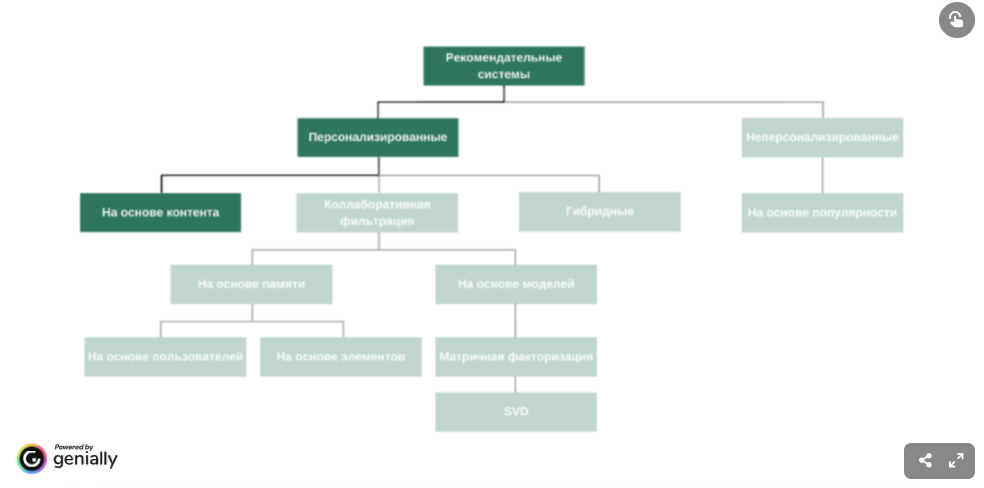

Подход content-based предполагает, что пользователю рекомендуются товары или контент на основе его предпочтений и вкусов.

Профиль интересов пользователя формируется исходя из его оценок, а также неявной обратной связи: лайков, количества просмотров и так далее. В качестве рекомендаций пользователю предлагаются похожие элементы.

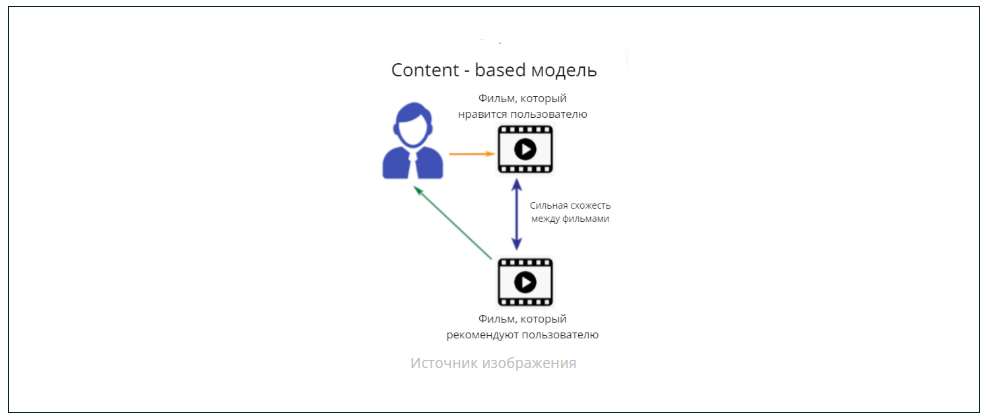

Вы наверняка уже сталкивались с content-based-рекомендациями в тех или иных сервисах. Например, на сайте Netflix можно использовать фильтрацию по контенту, чтобы создавать рекомендации из аналогичных элементов, которые размещаются в разделе More Like This.

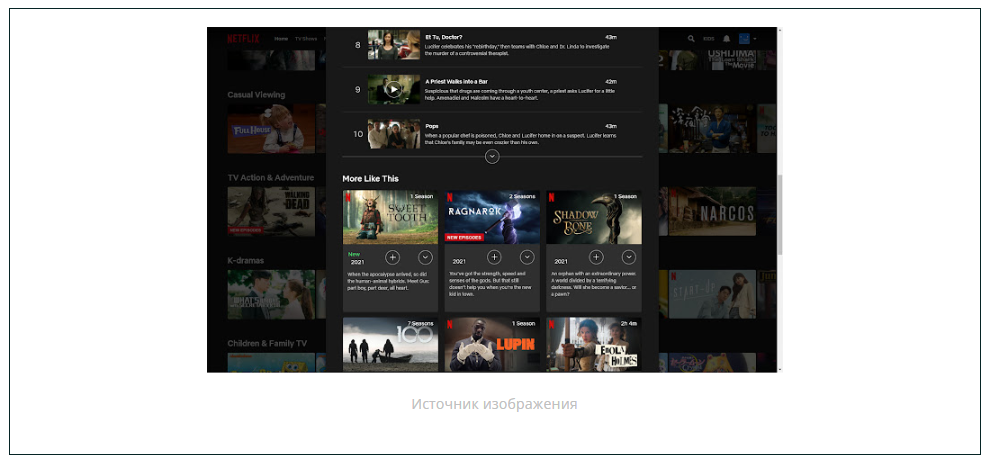

Давайте на примере рассмотрим построение рекомендательной системы на основе контента для конкретного пользователя.

Допустим, пользователь Михаил выставил лайки и дизлайки для фильмов на одном из веб-сервисов:

Предположим, что по правилам сервиса лайк прибавляет 4.5 балла к фильмам с таким жанром, а дизлайк вычитает 6 баллов. Теперь создадим вектор пользователя для Михаила на основе трёх его оценок:

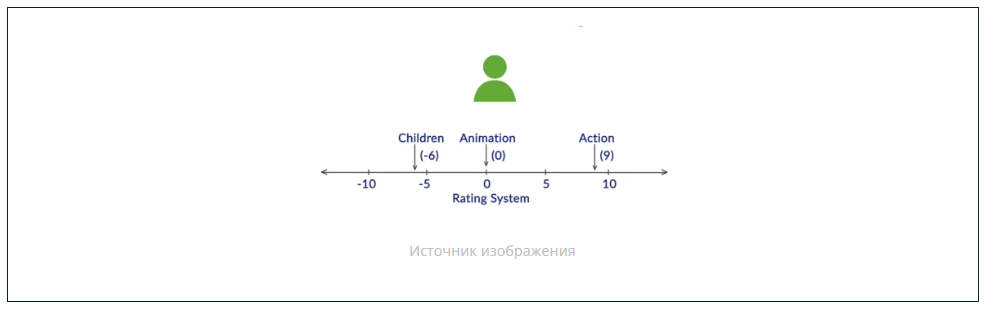

Присваиваем значение 9 боевикам, так как Михаил поставил лайк двум фильмам с жанром «боевик». Михаил не смотрел анимационные фильмы, так что присваиваем 0 анимации, и, поскольку он оставил плохой отзыв фильму в жанре «дети», присваиваем -6 детским фильмам.

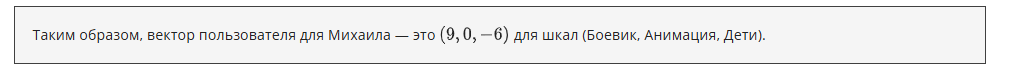

Теперь попробуем предсказать отношение Михаила к фильмам, которые он ещё не смотрел, например «Звёздные войны» и «История игрушек».

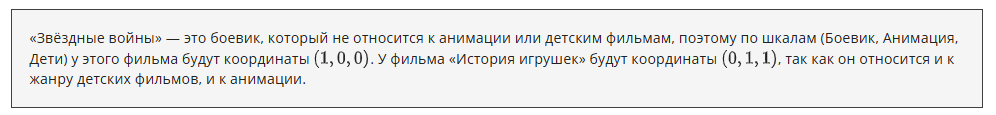

Теперь нам необходимо найти произведения вектора пользователя и вектора фильма: чем больше будет скалярное произведение, тем более подходящим для Михаила будет фильм.

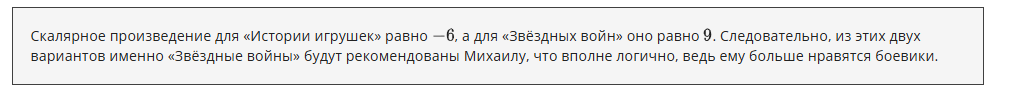

Аналогично можно вычислить скалярные произведения векторов для всех фильмов на сайте и рекомендовать Михаилу десять наиболее подходящих фильмов.

В данном примере мы опирались лишь на схожесть фильмов по жанрам: скалярное произведение будет увеличиваться в том случае, если у фильма ненулевая координата для того жанра, который пользователь уже оценил положительно. Однако в реальности всё намного сложнее: например, мы можем использовать одновременно жанр фильма, теги, описание, актёров и т. д. Для этого случая нам нужен способ измерить сходство между набором параметров.

Рассмотрим два наиболее популярных метода измерения такого сходства:

- **индекс Жаккара**,
- **косинусная близость**.

**Индекс Жаккара**

Индекс Жаккара измеряет сходство между двумя наборами A и B как мощность множества пересечения, делённую на мощность множества объединения каких-то характеристик объекта. Его удобно применять для категориальных признаков.

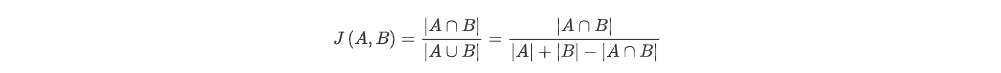

Например, с помощью индекса Жаккара мы можем оценить, насколько похожи фильмы, основываясь на наборах ключевых слов (тегов) для них:

- фильм А : {фантастика, школа, романтика};
- фильм B : {приключения, фантастика, школа};
- фильм C : {ужасы, триллер, драма}.

Мы можем предположить, что фильм A больше похож на фильм B, чем на фильм C, так как фильмы A и B имеют два общих тега (фантастика, школа), в то время как фильмы A и C не имеют ни одного общего тега.

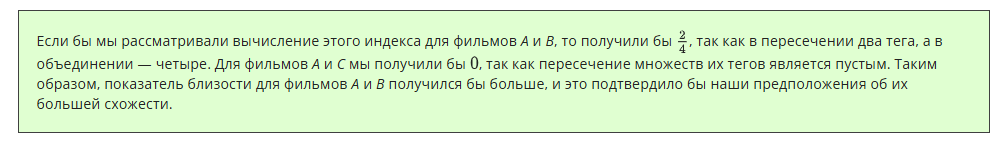

**Косинусная близость**

Подход с использованием индекса Жаккара помог нам создать интуитивное представление о том, что означает сходство набора категориальных значений. Подход с косинусным сходством немного сложнее и применяется для оценки близости массивов с числами. Он требует, чтобы мы представляли объекты в виде вектора.

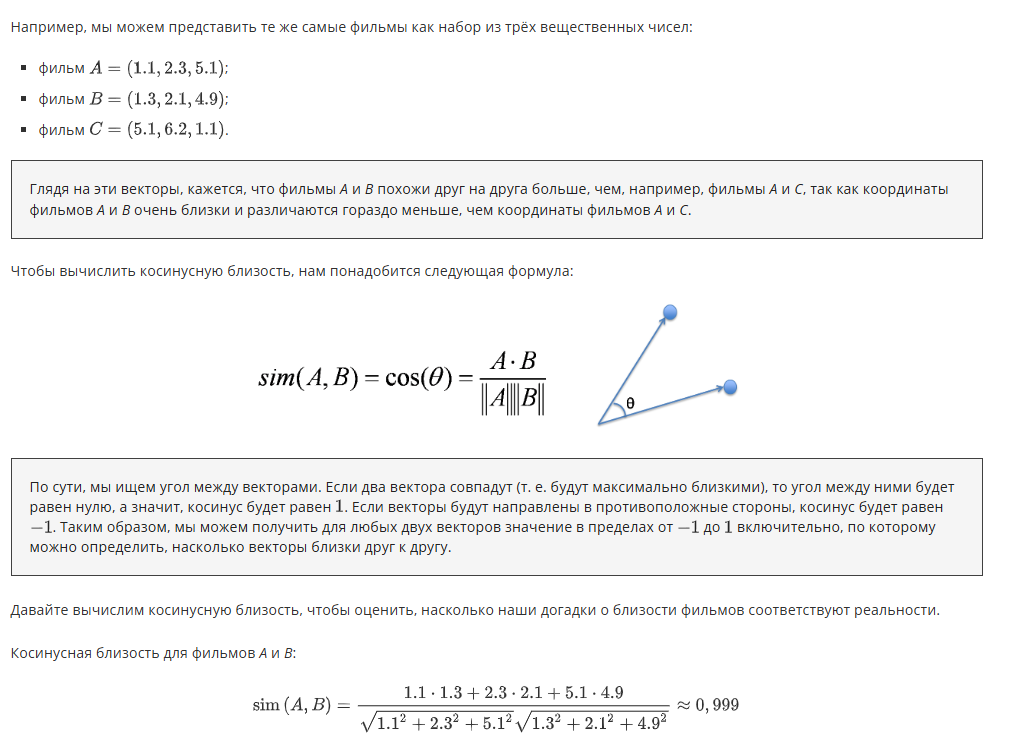

Как нам известно, чем выше значение косинусной близости, тем больше сходство между векторами. Таким образом, наши изначальные предположения совпали с реальностью: векторы А и В действительно схожи между собой сильнее, чем векторы А и С. Значит, если человек поставил высокую оценку фильму А, то мы должны порекомендовать ему фильм В.

Итак, чтобы построить рекомендательную систему на основе контента, необходимо:

1. Для каждого продукта создать характеризующие его признаки.
2. Найти показатель близости между всеми продуктами.
3. Порекомендовать пользователю продукты, которые показывают наибольшую близость с теми продуктами, которые он высоко оценил.

Давайте реализуем подобную рекомендательную систему на практике. Будем работать с датасетом, содержащим информацию об оценивании фильмов на платформе Netflix.

- show_id — id фильма,
- type — его тип (фильм или сериал),
- title — название,
- director — режиссер,
- cast — актерский состав,
- country — страна,
- date_added — дата добавления,
- release_year — год выхода на экраны,
- rating — рейтинг,
- duration — продолжительность,
- listened_in — жанр(-ы),
- description — описание.

В первую очередь нам необходимо определить, на основании чего мы будем рассматривать близость фильмов. Выберем для этой задачи описание фильма, ведь в нём, скорее всего, содержится много информации. Однако описание — это текст. Есть много подходов к преобразованию текста в вектор, и мы будем использовать подход TF-IDF (Term Frequency-Inverse Document Frequency).

Показатель TD-IDF — это индикатор того, насколько релевантно слово в контексте документа.

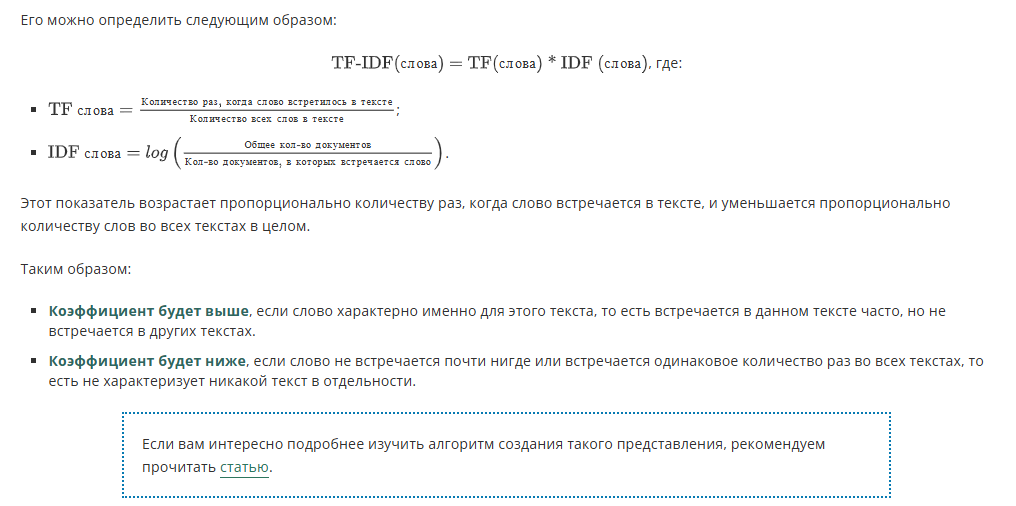

https://medium.com/analytics-vidhya/tf-idf-term-frequency-technique-easiest-explanation-for-text-classification-in-nlp-with-code-8ca3912e58c3

Чтобы преобразовать текст по этому принципу, нам понадобится соответствующая функция из библиотеки sklearn — импортируем её:

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

Далее учтём стоп-слова, т. е. предлоги и другие служебные части речи, которые не несут содержательной информации, и с учётом этого определим нашу модель:

In [10]:
model = TfidfVectorizer(stop_words='english')

Заполним пропуски пустыми строками:

In [11]:
import pandas as pd
df = pd.read_csv('data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [12]:
df['description'] = df['description'].fillna('')

Трансформируем наши описания в матрицу:

In [15]:
feature_matrix = model.fit_transform(df['description'])
display(feature_matrix)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 107187 stored elements and shape (7787, 17905)>

Теперь необходимо вычислить косинусную близость. Можно сделать это так:

In [17]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(feature_matrix, feature_matrix)

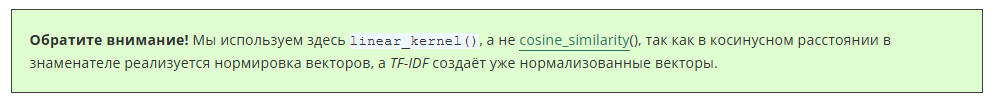

Вернём индексацию и уберём дубликаты из данных:

In [18]:
indices = pd.Series(df.index,index=df['title']).drop_duplicates()

Теперь пропишем функцию для создания рекомендаций:

In [19]:
def get_recommendations(title):
    idx = indices[title]
    #вычисляем попарные коэффициенты косинусной близости
    scores = list(enumerate(cosine_sim[idx]))
    #сортируем фильмы на основании коэффициентов косинусной близости по убыванию
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    #выбираем десять наибольших значений косинусной близости; нулевую не берём, т. к. это тот же фильм
    scores =   scores[1:11]
    #забираем индексы
    ind_movie = [i[0] for i in scores]
    #возвращаем названия по индексам
    return df['title'].iloc[ind_movie]

Например, если мы хотим найти рекомендации по фильму "Star Trek", то функция будет выдавать следующий результат:

In [20]:
get_recommendations('Star Trek')

5788             Star Trek: The Next Generation
5787                      Star Trek: Enterprise
5786                 Star Trek: Deep Space Nine
5557                     She's Out of My League
134                                  7 Days Out
6664                        The Midnight Gospel
6023                                     Teresa
4863    Pinkfong & Baby Shark's Space Adventure
5104                                       Rats
5970                             Tales by Light
Name: title, dtype: object

Найдите вторую рекомендацию для детского фильма "Balto", вышедшего на экраны в 1995 году:

In [21]:
get_recommendations('Balto')

709                Balto 2: Wolf Quest
7446                           Vroomiz
1338    Chilling Adventures of Sabrina
7388                          Vampires
1770                          Dinotrux
2767                     Hold the Dark
5540                 Shanghai Fortress
4041                             Mercy
2582                       Half & Half
1365        Christmas in the Heartland
Name: title, dtype: object

Итак, мы смогли создать рекомендации на основе контента и разобрались с принципом работы этого алгоритма. Теперь давайте посмотрим на преимущества и недостатки данного подхода.

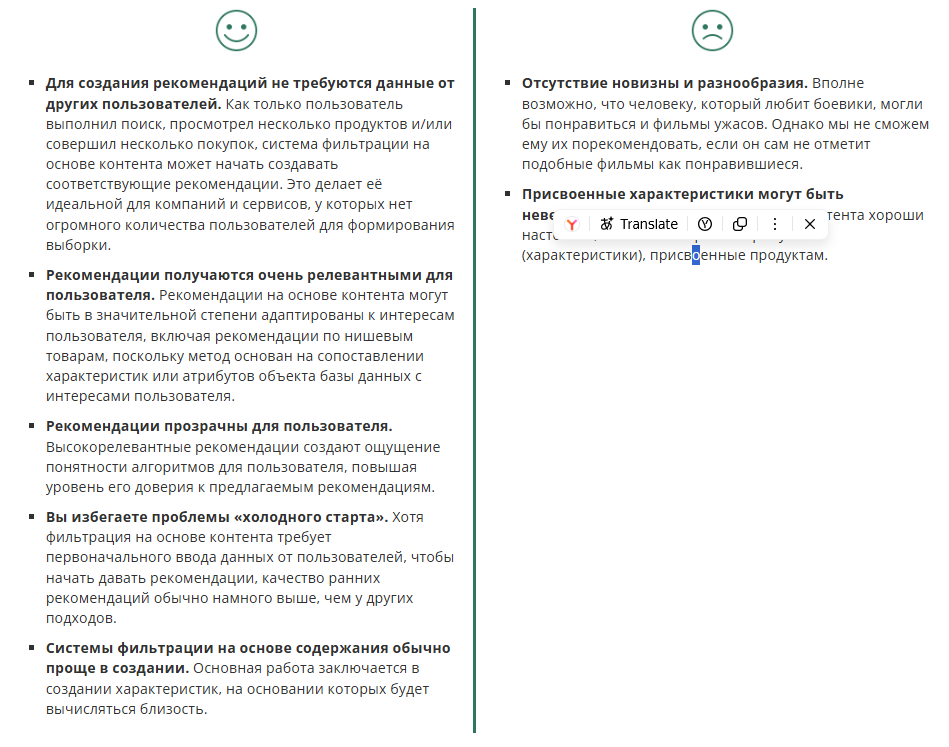

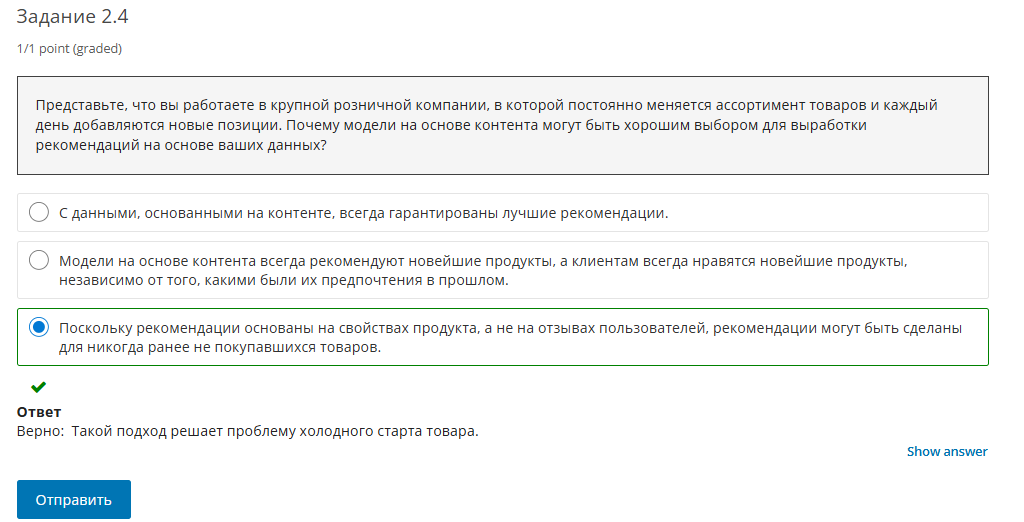

Итак, мы разобрались с первым персонализированным методом для построения рекомендательных систем. В следующих юнитах мы детально изучим другие алгоритмы.

# 3. Коллаборативная фильтрация

✍ Следующий подход к построению рекомендательных систем, который мы изучим, — это коллаборативная фильтрация. Она основана на поиске сходства между пользователями или между продуктами. Используя этот метод, мы можем прогнозировать рейтинги на основе оценок похожих пользователей или похожих продуктов.

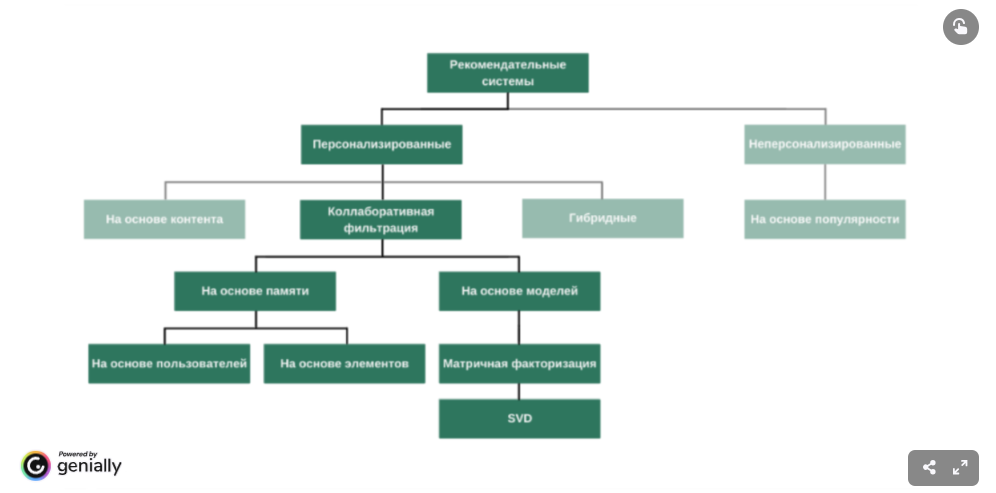

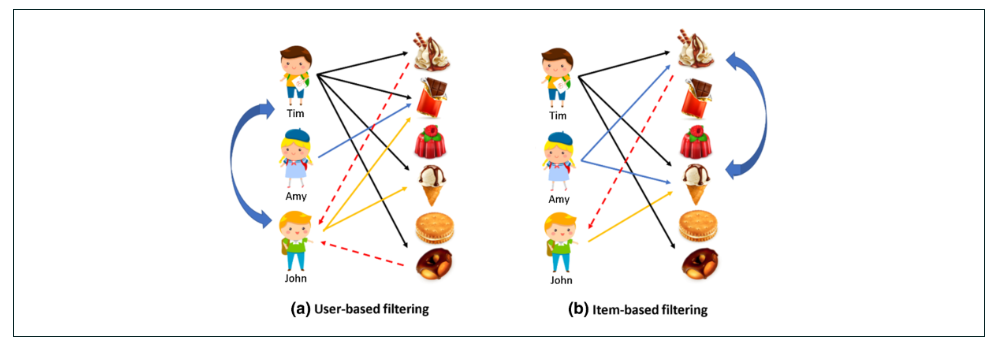

Однако для начала давайте рассмотрим очень часто встречающуюся в рекомендательных системах концепцию — матрицу предпочтений.

Чтобы её получить, расположим в матрице клиентов по строкам, а продукты — по столбцам. На пересечении строк и столбцов разместим оценки, поставленные клиентами соответствующим продуктам: первый клиент поставил второму товару 3, третий клиент поставил первому товару 2 и так далее.

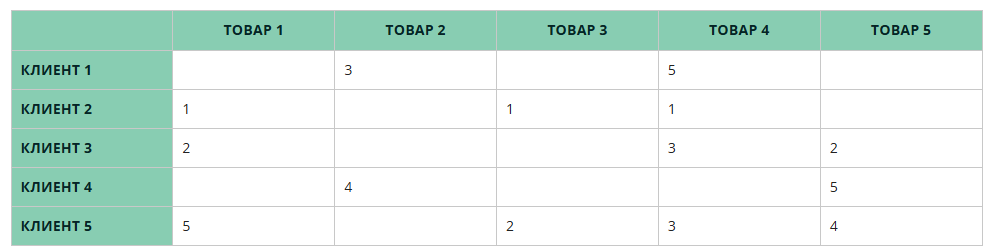

На основе этих данных мы можем разделить пользователей на кластеры. Чтобы это сделать, можно взять некоторую меру близости для пользователей по их истории оценок и на основе полученных значений объединить пользователей в кластеры таким образом, чтобы похожие пользователи оказались в одной группе, а сильно отличающиеся — в разных. В таком случае оценку пользователя для продукта можно прогнозировать как среднюю оценку пользователей этого кластера, оценивших этот продукт.

Таким образом, если нам необходимо предсказать, как конкретный пользователь оценил фильм, мы анализируем оценки, поставленные данному фильму пользователями, которые принадлежат к тому же кластеру, что и изучаемый пользователь, и усредняем эти оценки. Так получается предсказание оценки фильма для нашего пользователя.

В целом, такой подход можно применять, однако у него есть ряд существенных недостатков:

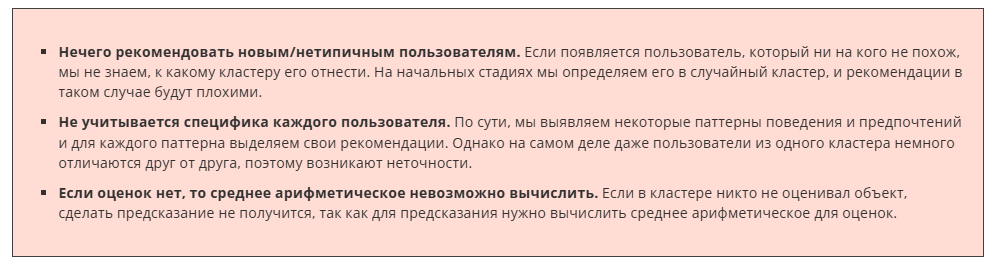

### Коллаборативная фильтрация на основе памяти (memory-based)

Чтобы решить перечисленные выше проблемы, обратимся к коллаборативной фильтрации, а точнее к memory-based-подходу, основанному на близости пользователей (user-based).

Напомним, что при memory-based-подходе хранится полная матрица взаимодействий (лайков, просмотров и т. д .) пользователя с продуктом.

### Коллаборативная фильтрация на основе пользователей (User-based-подход)

**Коллаборативная фильтрация на основе пользователей** — это метод, используемый для предсказания продуктов, которые могут понравиться пользователю, на основе оценок, выставленных этому продукту другими пользователями, имеющими схожие с целевым пользователем вкусы.

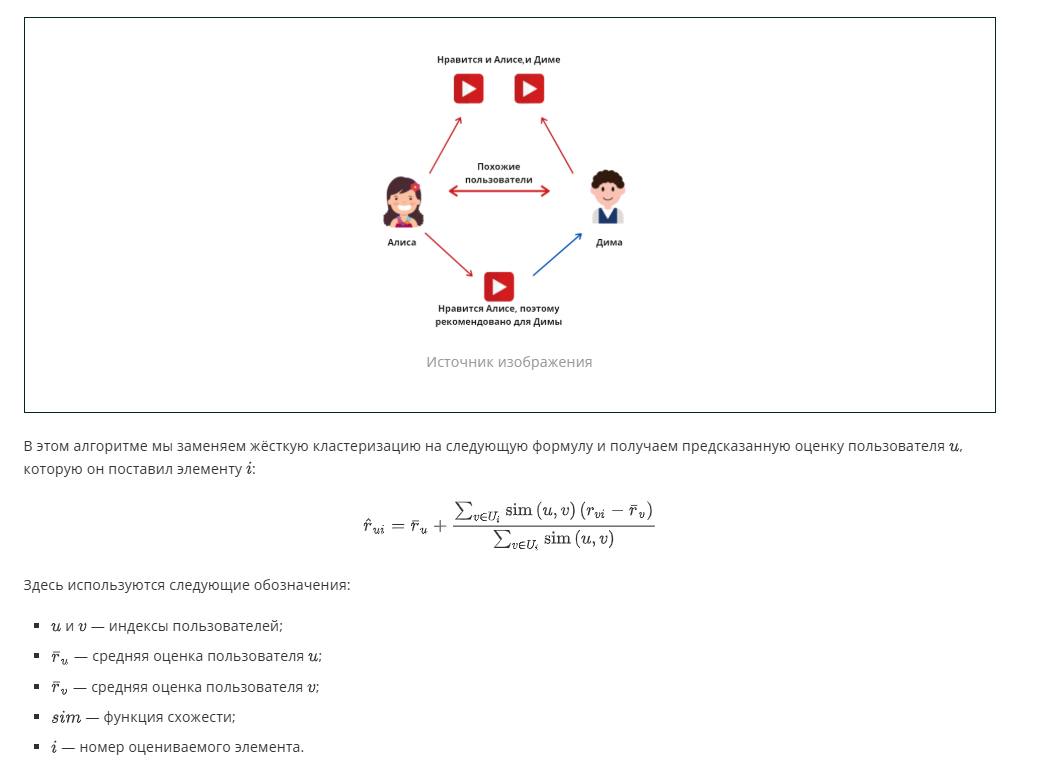

Средняя оценка пользователя может быть никак не привязана к его интересам. По сути, это просто показатель того, как в среднем пользователь привык оценивать фильмы.

Оценка пользователя, которую мы предсказываем для него, состоит из **двух частей**:

- Непосредственно его средняя оценка.
- Слагаемое, состоящее из разницы в оценках с другими пользователями, т. е. похожести пользователей. Эта разница домножается на похожесть пользователей, то есть в числителе — средневзвешенная разница в оценках, а в знаменателе — сумма показателей схожести.

Каждому клиенту мы подбираем релевантный для него товар в рамках группы клиентов, но не решаем задачу кластеризации, а усредняем интересы данной группы в дистанции нескольких соседей. По сути, здесь мы руководствуемся идеей, что, например, видео можно порекомендовать человеку, если оно понравилось его друзьям.

Давайте разберём пример применения этого алгоритма.

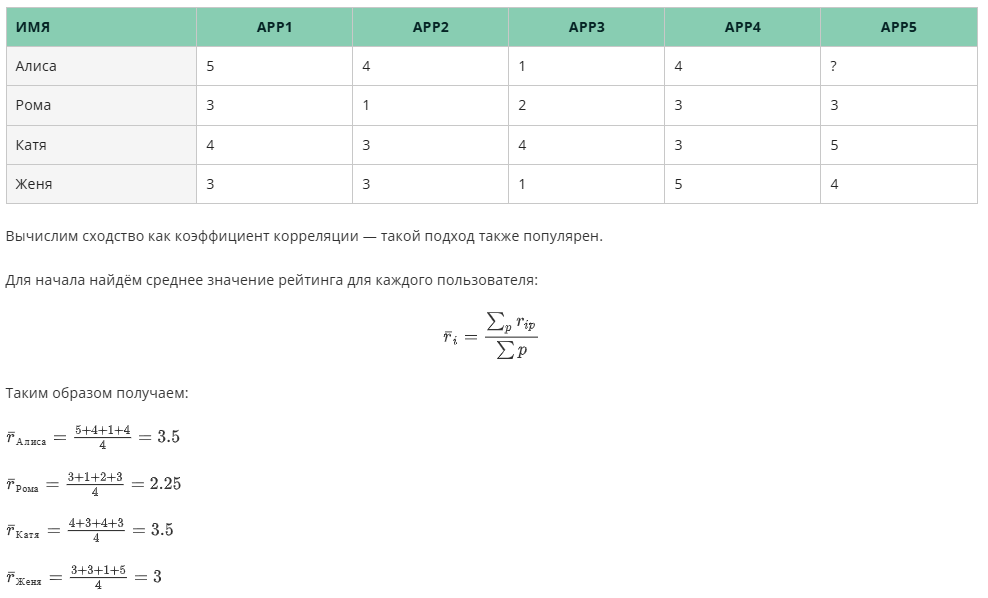

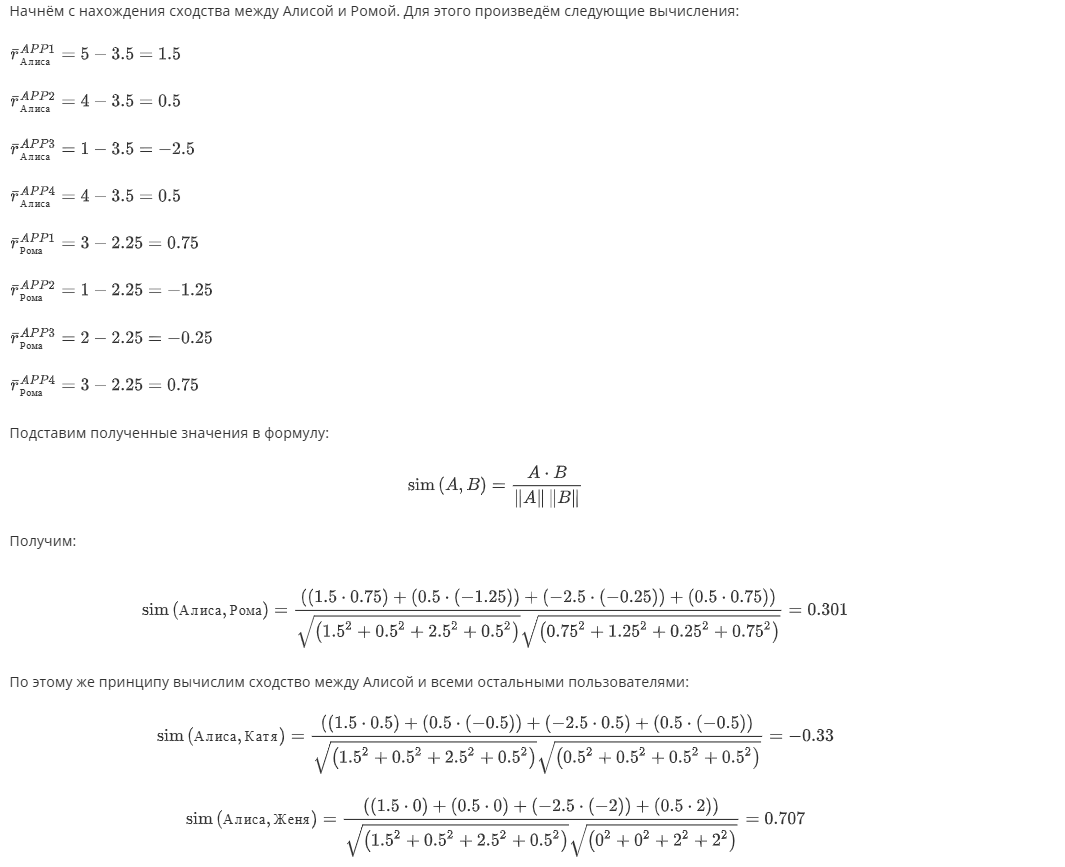

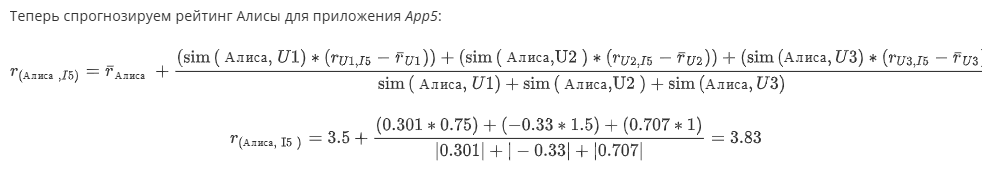

Итак, мы смогли реализовать предсказание для user-based-подхода.

### Коллаборативная фильтрация на основе элементов (Item-based-подход)

Если мы транспонируем матрицу предпочтений и будем решать ту же самую задачу не для пользователей, а для объектов (items), то получим аналогичную задачу, которая является item-based-моделью коллаборативной фильтрации и даёт нам возможность предсказывать оценку следующим образом:

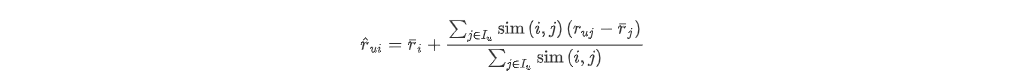

По формуле можно понять, что этот подход использует идею предыдущего, только теперь похожи не пользователи, а объекты. Возвращаясь к примеру с рекомендациями фильмов, теперь мы рекомендуем пользователю фильм, который похож на те фильмы, которые уже понравились этому пользователю ранее.

Кроме того, продуктов обычно больше, чем пользователей, поэтому векторы получатся большей размерности. Это даёт возможность получить более устойчивую модель с большей статистической значимостью.

Может показаться, что коллаборативная фильтрация в рамках item-based-подхода очень похожа на модель на основе контента. Однако это не так: item-based-модель рассматривает взаимодействия пользователей с продуктом, а content-based-модель — метаинформацию продукта.

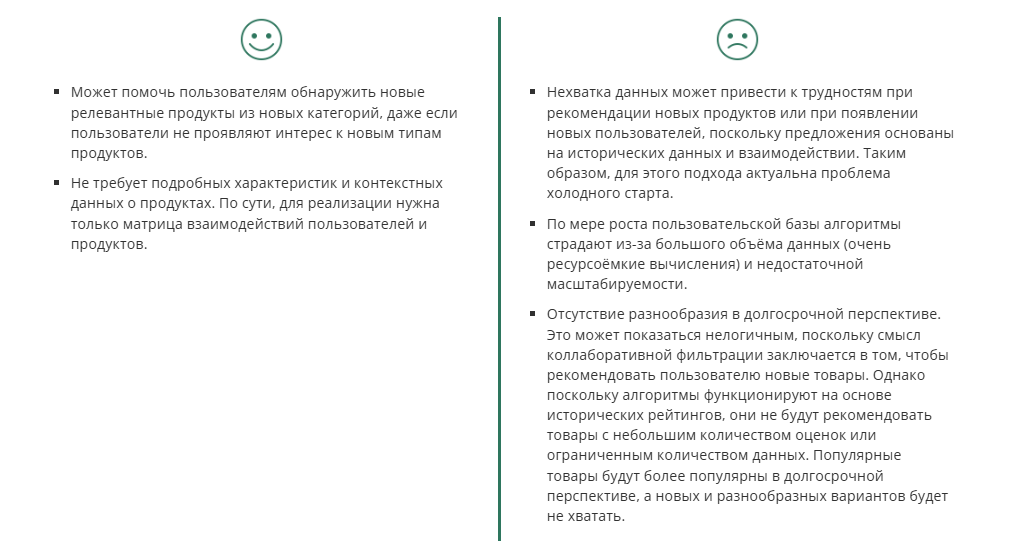

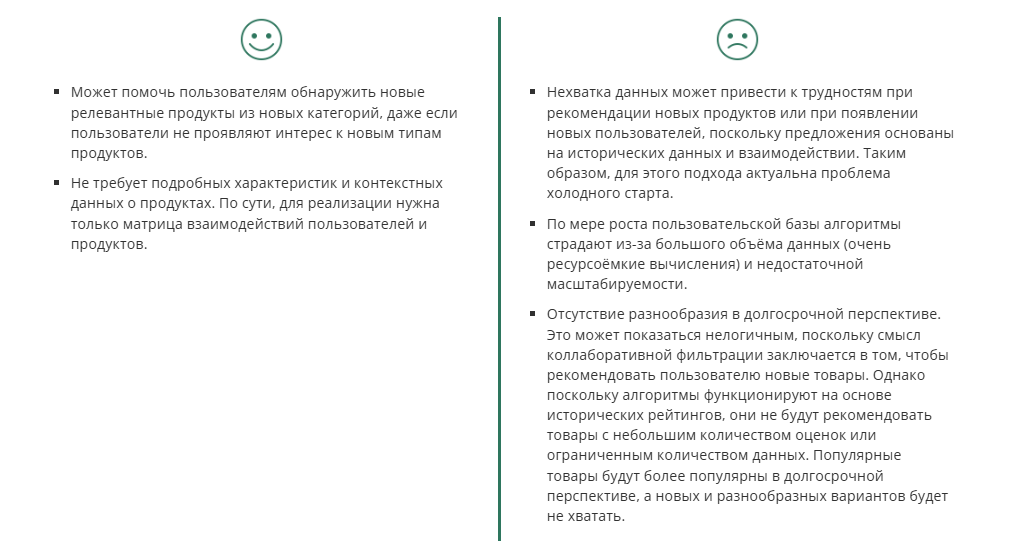

### Model-based-подход

В подходе на основе моделей используются модели машинного обучения для прогнозирования и ранжирования взаимодействий между пользователями и элементами, с которыми они ещё не взаимодействовали. Эти модели обучаются на основе информации, уже имеющейся в матрице взаимодействий, с помощью различных алгоритмов, например матричной факторизации.

**Матричная факторизация** используется для генерации **латентных признаков** путём разложения **разрежённой** матрицы взаимодействия пользователя и продукта на две меньшие и **плотные** матрицы особенностей пользователей и продуктов.

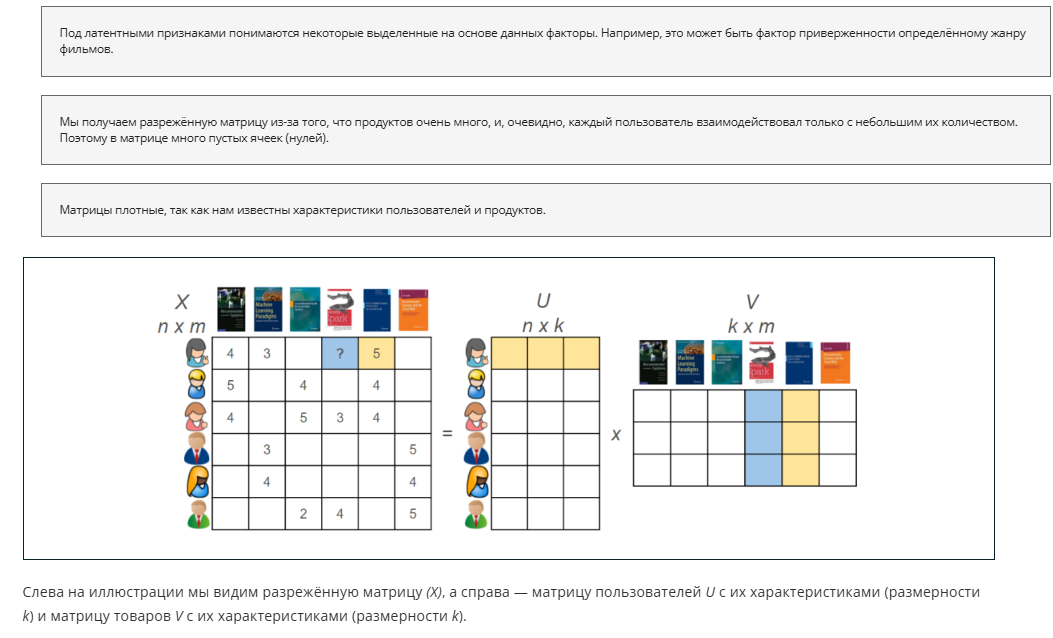

Рассмотрим два варианта матричной факторизации — SVD и ALS.

SVD — это сингулярное разложение, с которым вы уже подробно знакомились в модуле по кластеризации. Давайте вспомним суть SVD.

Любую прямоугольную матрицу A размера (n, m) можно представить в виде произведения трёх матриц:

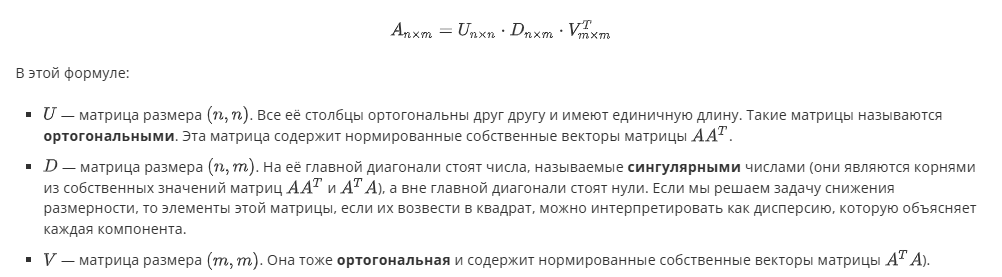

Данное разложение используют для того, чтобы представить матрицу предпочтений как разложение на матрицу с характеристиками пользователей и матрицу с характеристиками продуктов. Матрица U представляет связь между пользователями и латентными факторами, D — диагональная матрица, описывающая силу каждого латентного фактора, а V — матрица, описывающая связь между продуктами и латентными факторами.

Однако SVD — не единственная возможность для разложения матрицы. Второй популярный алгоритм — ALS (Alternating Least Square).

ALS — итеративный алгоритм разложения матрицы предпочтений на произведение двух матриц.

Чтобы понять лучше суть этого алгоритма, вспомним одну из известных нам функций потерь — RMSE.

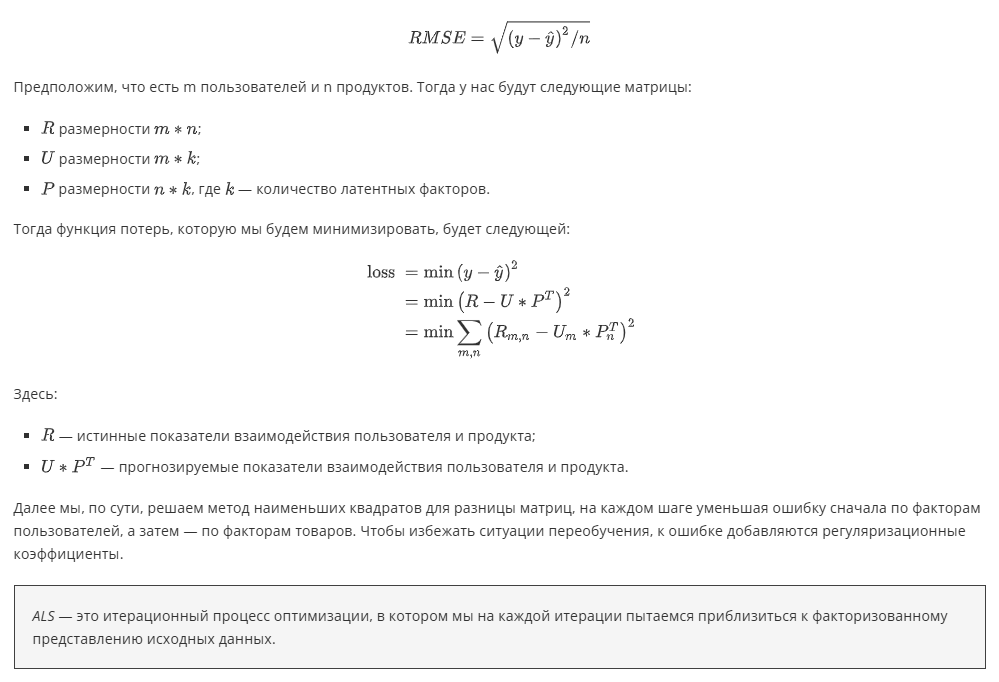

Давайте рассмотрим реализацию ALS на «игрушечном» примере. Допустим, у нас есть некоторая матрица, которая содержит информацию про пользователей и их отношение к фильмам:

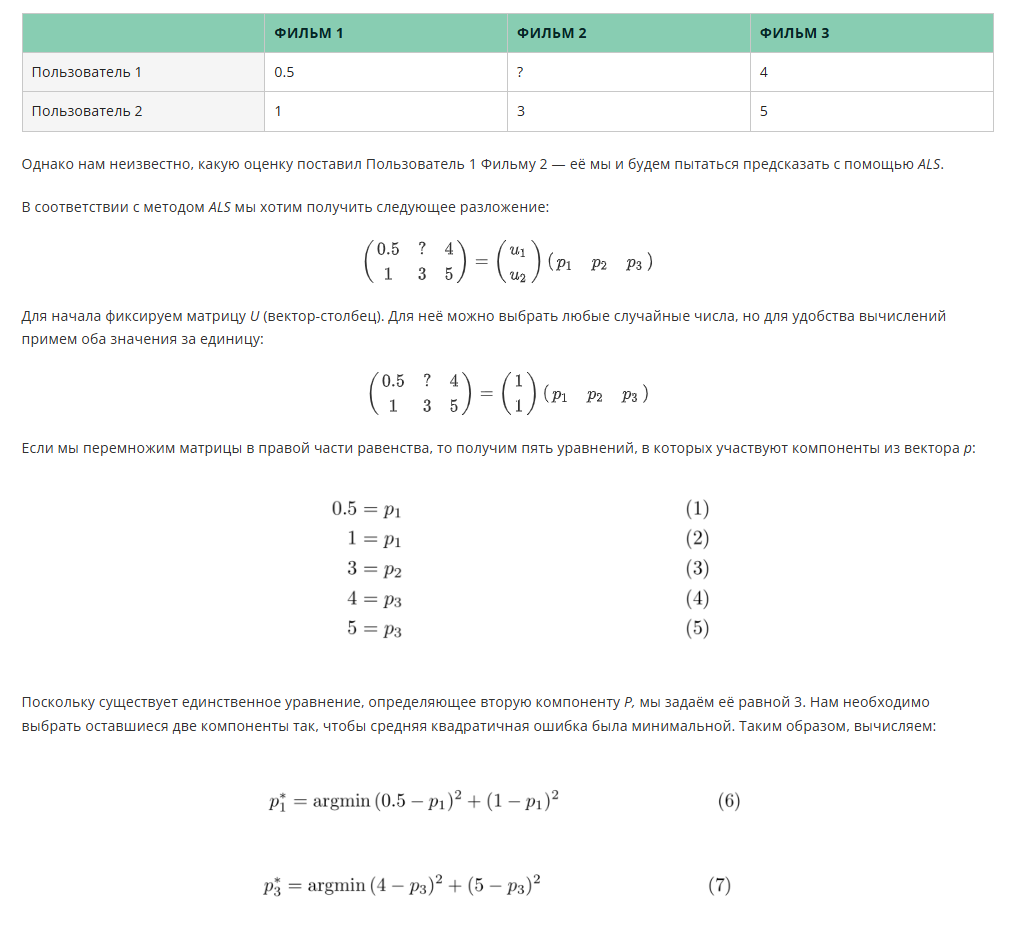

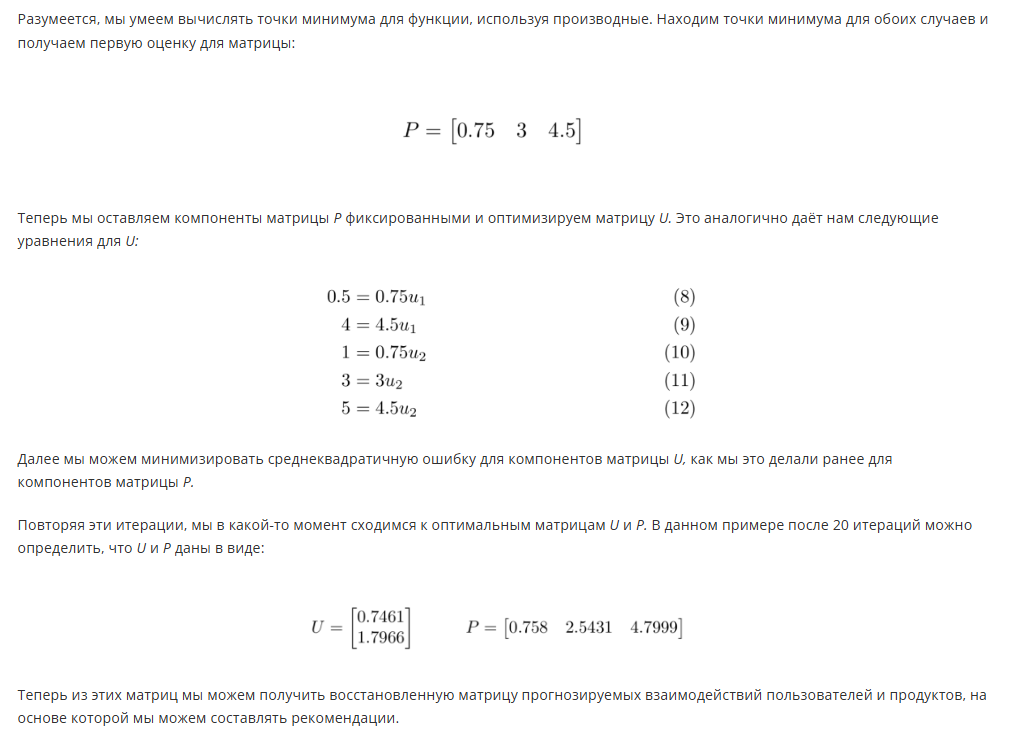

### Практика

Мы рассмотрели несколько вариантов коллаборативной фильтрации на простейших примерах, и теперь пришло время практики с настоящими данными. Сначала мы будем использовать подход memory-based в модификации item-based, а затем SVD. В результате применения обоих алгоритмов мы сможем сравнить получившееся качество.

Для создания алгоритмов рекомендательной системы будем использовать библиотеку surprise.

Установим её:

In [24]:
#%pip install scikit-surprise

Примечание. Заметьте, что в названии библиотеки содержится название уже известного нам модуля scikit — это не просто так: названия функций и аргументов, да и сам принцип работы этих модулей похожи.

В нашей задаче мы будем использовать датасет movielens, который содержит информацию о фильмах и выставленных рейтингах с сайта https://movielens.org/.

Импортируем необходимые нам компоненты и считаем данные с помощью специального метода Reader:

> surprise не работает на Windows

In [ ]:
from surprise import Dataset
from surprise import Reader
from surprise.dataset import BUILTIN_DATASETS #с помощью данного объекта мы можем использовать встроенные датасеты

data = Dataset.load_from_file(
    "u.data.txt",
    reader=Reader(line_format="user item rating timestamp", sep="\t"),
)

In [60]:
# Fixed: Use pd.read_csv() instead of pd.read_txt()
data = pd.read_csv('data/u.data.csv', names=['user_id', 'item_id', 'rating', 'timestamp'])
data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


В данных присутствуют следующие признаки:

- userId — идентификаторы пользователей сайта movielens;
- movieId — идентификаторы фильмов;
- rating — оценки фильмов, выставленные пользователями по шкале от 1 до 5;
- timestamp — время оценки фильма пользователем. Данный формат представления времени показывает, сколько секунд прошло с 1 января 1970 года.

In [61]:
print('Сколько уникальных фильмов в наборе данных')
print(len(data['item_id'].unique()))
data.apply('nunique')

Сколько уникальных фильмов в наборе данных
1682


user_id        943
item_id       1682
rating           5
timestamp    49282
dtype: int64

In [62]:
print('Сколько уникальных пользователей в наборе данных')
len(data['user_id'].unique())

Сколько уникальных пользователей в наборе данных


943

In [63]:
print('Какая оценка встречается в наборе данных чаще всего? Введите ответ в виде целого числа.')
data['rating'].value_counts()

Какая оценка встречается в наборе данных чаще всего? Введите ответ в виде целого числа.


rating
4    34174
3    27145
5    21201
2    11370
1     6110
Name: count, dtype: int64

Библиотека surprise очень похожа на библиотеку sklearn, и тоже позволяет разбить данные на обучающую и тестовую выборки всего одной функцией — surprise.model_selection.train_test_split().

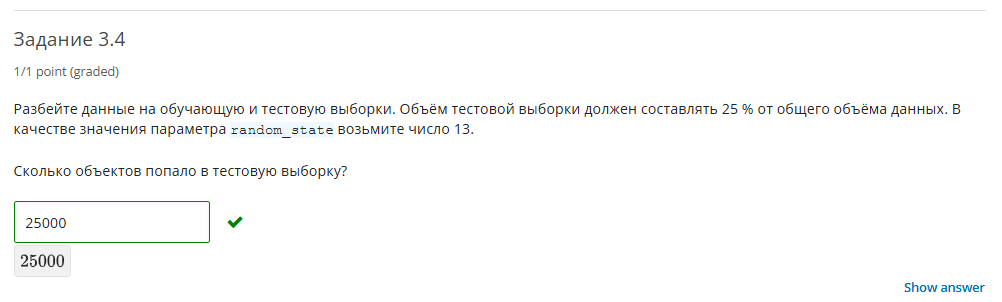

In [ ]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=0.25, random_state=13)
len(testset)

Импортируем функции для построения рекомендательных систем (SVD — для model-based-подхода и KNNBasic — для memory-basic-подхода) и для оценки качества результата.

In [ ]:
from surprise import SVD, KNNBasic, accuracy

Теперь реализуем обычную коллаборативную фильтрацию. Выберем оценку схожести через косинусную близость и item-based-подход:

In [ ]:
sim_options = {
    'name': 'cosine',
    'user_based': False
}
 
knn = KNNBasic(sim_options=sim_options)

Обучим алгоритм:

In [ ]:
knn.fit(trainset)

Теперь давайте посмотрим, какие рекомендации мы получили, с помощью следующей программы:

In [ ]:
predictions = knn.test(testset)
predictions

После этого можно вывести результат, записанный в переменную predictions.

Информация о каждой паре будет содержать следующие характеристики:

- uid — id пользователя;
- iid — id элемента;
- r_ui (float) — реальный рейтинг, который этот пользователь поставил этому элементу;
- est (float) — предсказанный рейтинг.

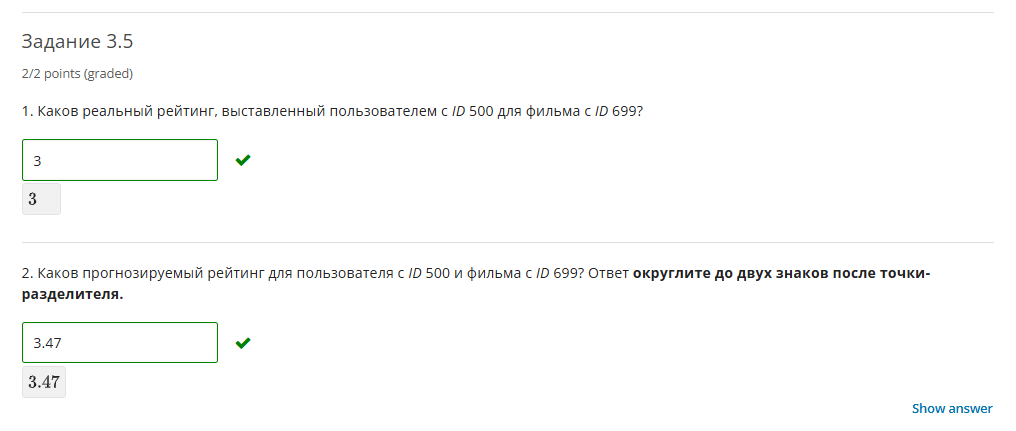

In [ ]:
for prediction in predictions:
    if prediction.uid == '500' and prediction.iid == '699':
        print(prediction.r_ui)
        print(round(prediction.est, 2))
        break

In [ ]:
uid = str(500)
iid = str(699)  
pred = knn.predict(uid, iid, verbose=True)

Теперь необходимо вычислить RMSE для получившихся предсказаний:

In [ ]:
accuracy.rmse(predictions)

Если округлить результат до сотых, получаем 1.03

Итак, мы построили систему рекомендаций и даже оценили её качество. Но как же вывести рекомендации для конкретного пользователя?

Для начала давайте оформим наши предсказания в таблицу и отсортируем их по прогнозируемому рейтингу:



In [ ]:
pred = pd.DataFrame(predictions)
pred.sort_values(by=['est'],inplace=True,ascending = False)

Теперь мы можем вывести рекомендуемые для конкретного пользователя фильмы, начиная от наиболее релевантного (с точки зрения рекомендаций) и заканчивая наименее релевантным.

In [ ]:
recom = pred[pred.uid =='849']['iid'].to_list()

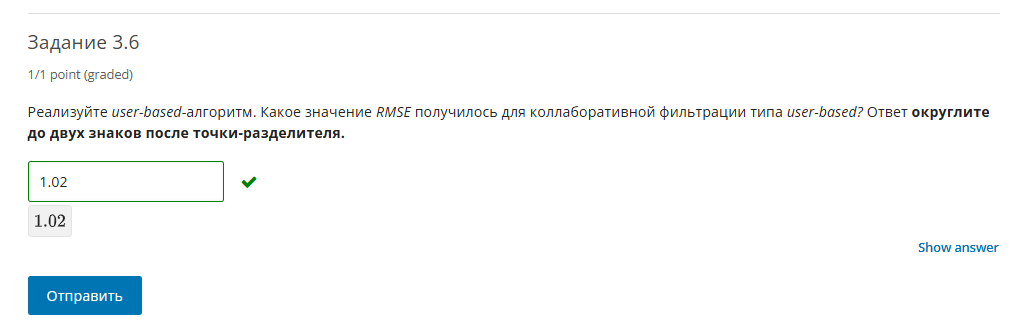

In [ ]:
sim_options = {
    'name': 'cosine',
    'user_based': True
}
knn = KNNBasic(sim_options=sim_options)
knn.fit(trainset)
predictions = knn.test(testset)
accuracy.rmse(predictions)

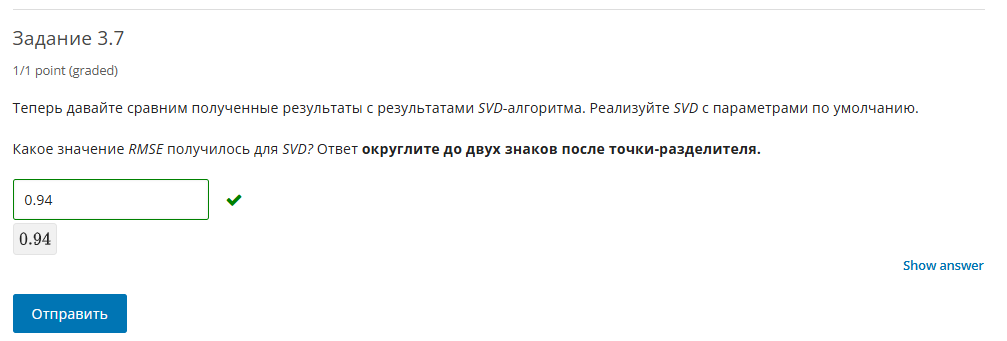

In [ ]:
model = SVD()
model.fit(trainset)
predictions = model.test(testset)
accuracy.rmse(predictions)

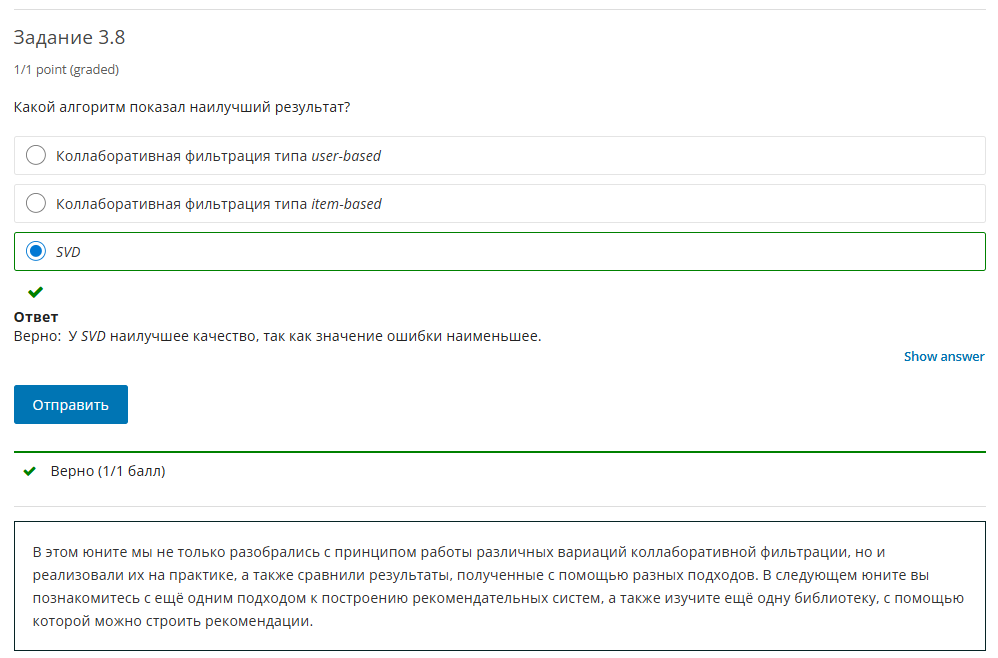

# 4. Гибридные модели